In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import data

In [20]:
def getdata(mean, var, n):
    dataset = []
    for _ in range(n):
        x = data.gaussianGenerator(mean[0], var[0])
        y = data.gaussianGenerator(mean[1], var[1])
        dataset.append((x, y))
    return np.array(dataset)

In [21]:
dataset1 = getdata((-5, 5), (5, 5), 100)
dataset1 = pd.DataFrame(dataset1, columns=['x1', 'x2'])
dataset1['target'] = 0
dataset1['x0'] = 1
dataset1.head()

,x1,x2,target,x0
0,-4.653948,5.302351,0,1
1,-3.567408,5.199419,0,1
2,-6.351235,9.391363,0,1
3,-0.734452,4.179613,0,1
4,-3.392641,4.731987,0,1


In [22]:
dataset2 = getdata((5, -4), (2, 2), 100)
dataset2 = pd.DataFrame(dataset2, columns=['x1', 'x2'])
dataset2['target'] = 1
dataset2['x0'] = 1
dataset2.head()

,x1,x2,target,x0
0,3.758784,-4.699389,1,1
1,7.756577,-2.990751,1,1
2,5.981693,-5.193231,1,1
3,3.065927,-3.710692,1,1
4,5.079146,-5.006420,1,1


In [23]:
dataset = pd.concat([dataset1, dataset2], ignore_index=True)
dataset.head()

,x1,x2,target,x0
0,-4.653948,5.302351,0,1
1,-3.567408,5.199419,0,1
2,-6.351235,9.391363,0,1
3,-0.734452,4.179613,0,1
4,-3.392641,4.731987,0,1


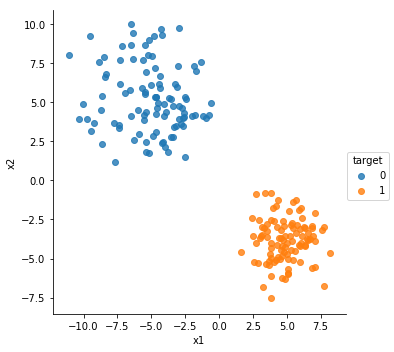

In [24]:
sns.lmplot(x='x1', y='x2', data=dataset, hue='target', fit_reg=False)

Using Steepest Gradient Descent

In [25]:
def sigmoid(z):
    output = 1 / (1 + np.exp(-z))
    return output

In [26]:
def AMatrix(dataset):
    A = np.zeros((dataset.shape[0], dataset.shape[1] - 1))
    A[:, 0] = dataset['x0']
    A[:, 1] = dataset['x1']
    A[:, 2] = dataset['x2']
    return A

In [27]:
def target(dataset):
    return dataset['target'].as_matrix().reshape(-1, 1)

In [28]:
def update(weight, prediction, target, A, rate):
    gradient = np.matmul(np.transpose(A), prediction - target) / A.shape[0]
    return weight + rate * gradient

In [29]:
def DMatrix(A, weight):
    size = A.shape[1]
    number = A.shape[0]
    D = np.zeros((size, size))
    for i in range(number):
        for j in range(size):
            D[j][j] += np.exp(-A[i][j] * weight[j][0]) / (1 + np.exp(-A[i][j] * weight[j][0]))**2
            D[j][j] /= 2
#     D /= number
    return D

In [30]:
def NewtonUpdate(hession, weight, prediction, target, A, rate):
    gradient = np.matmul(np.transpose(A), prediction - target) / A.shape[0]
    flag = True if np.abs(gradient).sum() < 0.01 else False
    # Test if hession is invertible
    if np.linalg.matrix_rank(hession) == hession.shape[0]:
        hession_inv = np.linalg.inv(hession)
        return weight + rate * (hession_inv @ gradient), flag
    else:
        return weight + rate * gradient, flag

In [31]:
A = AMatrix(dataset)
weight = np.random.randn(dataset.shape[1] - 1).reshape(-1, 1)
y = target(dataset)

In [32]:
count = 0
rate = 1
while(count < 1000):
    prediction = sigmoid(np.matmul(A, weight))
    D = DMatrix(A, weight)
    hession = np.transpose(A) @ A @ D
#     weight = update(weight, prediction, y, A, rate)
    weight, flag = NewtonUpdate(hession, weight, prediction, y, A, rate)
    count += 1
    rate *= 0.95
    if flag:
        break
weight

array([[ 1.04082145],
       [ 1.85471467],
       [-0.22222023]])

In [33]:
prediction = sigmoid(np.matmul(A, weight))
prediction

array([[1.55421705e-04],
       [1.19177603e-03],
       [2.69029236e-06],
       [2.22670322e-01],
       [1.82726985e-03],
       [6.89837661e-04],
       [2.48606410e-05],
       [4.93147600e-04],
       [2.21363763e-04],
       [6.73698089e-07],
       [1.39460752e-04],
       [8.88144443e-04],
       [5.52071897e-10],
       [1.67031421e-01],
       [8.14170260e-04],
       [1.91962232e-02],
       [4.73153420e-05],
       [2.93670995e-03],
       [1.12918936e-04],
       [3.26370643e-05],
       [1.81218227e-04],
       [2.24377094e-06],
       [3.97303317e-05],
       [1.17287759e-07],
       [8.57299590e-05],
       [1.22913784e-04],
       [6.70654049e-05],
       [7.81505970e-04],
       [1.52794804e-05],
       [1.08909339e-07],
       [9.02808037e-03],
       [1.74061655e-05],
       [2.65620909e-05],
       [1.53781242e-06],
       [4.02390327e-05],
       [3.55299991e-08],
       [9.65666873e-03],
       [4.09846696e-03],
       [2.59147348e-02],
       [2.11774121e-03],


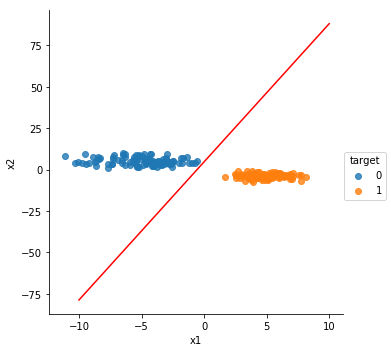

In [34]:
import matplotlib.pyplot as plt
l = np.linspace(-10, 10)
a, b = -weight[1][0]/weight[2][0], -weight[0][0]/weight[2][0]
sns.lmplot(x='x1', y='x2', data=dataset, hue='target', fit_reg=False)
plt.plot(l, a*l + b, 'r')

Confusion Matrix

In [35]:
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0

In [36]:
from sklearn.metrics import confusion_matrix
(tn, fp, fn, tp) = confusion_matrix(y, prediction).ravel()
print('tn: {}, fp: {}, fn:{}, tp: {}'.format(tn, fp, fn, tp))
print('Sensitivity: {}, Specificity: {}'.format(tp / (tp + fn), fp / (fp + tn)))

tn: 100, fp: 0, fn:0, tp: 100
Sensitivity: 1.0, Specificity: 0.0
